# Practical works 9 & 10 : Face recognition by Eigenfaces method


**The objective of this practical work is to study the properties of the Eigenfaces face recognition method.**

We propose to develop a system capable of:
- identify a face from a database of faces 
- determine whether an image contains a face present in the database
- to decide whether an image represents a face or not

Tools developed in this practical work will be applied on the Yale Faces Database.

## General principle

The problem of face recognition is defined as follows: given a face image, one wishes to determine the identity of the corresponding person.
To this end, it is necessary to have reference images, in the form of a database of faces of all persons known by the system. 
Each face is associated to a vector of characteristics. 
These characteristics are supposed to be invariant for the same person, and different from one person to another one. 
Face recognition then consists in comparing the vector of characteristics of the face to be recognized with those of each of the faces of the database. 
This makes it possible to find the person in the database having the most similar face.

There are several types of methods, distinguished by the type of characteristics used, see _S.A. Sirohey, C.L. Wilson, and R. Chellappa. Human and machine recognition of faces: A survey. Proceedings of the IEEE, 83(5), 1995_ for a state of the art:

- The approaches by face models proceed to a biometric analysis of faces. Pertinent biometrics are the distance between the eyes, length of the nose, shape of the chin...
- Image based approaches, by contrast, directly compare faces, considering them as images, for which measures of pre-attentive similarities (without a priori model) are defined.
- Hybrid approaches use the notions of similarity between images, but add a priori knowledge about the structure of a face.

![principe.png](./figs/Figure_1.png)
<center>Figure 1: General Principle of a Face Recognition System</center>

## Analysis by Eigenfaces

Face recognition by Eigenfaces is an image-based approach. 
Each face image is considered as a vector in a space having as many dimensions as the number of pixels in the image. 
The image characteristics are extracted by a method of dimensionality reduction based on principal component analysis (PCA). 
This approach was originally proposed in 1991, see Mr. Turk and A. Pentland. Eigenfaces for recognition. J. Cognitive Neuroscience, 3(1) :71-86, 1991_.

In the following, we will use the italic notation to designate scalars ($m, K,\dots$) and vectors ($x, u$), and boldface  for the matrices ($\mathbf X, \mathbf X_c, \mathbf W, \dots$).

A face image is noted $x$ and represented as a vector of $d$ components. $x[i] (i=0,\cdots,d-1)$ is the pixel number $i$ of this image. A set of faces form a cloud of points in the space $\mathbb{R}^d$. 
The database is divided into two sets: the *training* or *reference* set, used to learn the faces, and the *test* set, used to test the method. 
Faces of the training set are denoted by $x_k^{train}$ $(k=0,\cdots,N_{train}-1)$ and faces of the test set are denoted by $x_k^{test}$ $(k=0,\cdots,N_{test}-1) (k=0,\cdots,N_{test}-1)$.

We note $x_{average}$ the average of the reference faces, or average face. 
The principle of the Eigenfaces method is to model the difference of any face in relation to this average face by a linear combination of a limited number of images $u_h$, called Eigenfaces. 
One image of face $x \in \mathbb{R}^d$ is thus expressed as the average face to which is added a linear combination of eigenfaces:

$$x = x_{average} + \sum_h a_h u_h + \varepsilon$$

where $a_h$ represents the weight of *the eigenface* of index $h$ in the face $x$, and $\varepsilon$ represents the error between $x$ and its approximation by eigenfaces (error is due to the truncation of the basis of eigenvectors). 
Coefficients $a_h$ play a very important role for face recognition, because they correspond to the face coordinates $x$ in the face subspace.

The Eigenfaces method is based on the fact that the number of eigenfaces is much smaller than the total size of the space, which is called dimensionality reduction. In other words, the basis of eigenfaces is truncated, keeping only the vectors coding for the most significant information.
The images are therefore analyzed in a sub-space of reduced dimensions, which represents more specifically faces, among all possible types of images.

The average face is always the same for a fixed reference database, each face is examined after subtraction of the average face.

## Face database

We use the Yale Faces image database, http://cvc.cs.yale.edu/cvc/projects/yalefaces/yalefaces.html.
In this database, all the faces have been preprocessed, in order to resize and crop them to the size $64\times64$ pixels, so the images can be compared pixel per pixel.


This database contains 120 greyscale images, representing the faces of 15 people. There are 8 images per person, each corresponding to a category of images varying according to the following criteria (see Figure 2):
- variation of facial expression: normal, sad, sleepy, surprised,
    wink, happy
- variation of accessories: glasses, noglasses,

![database.png](./figs/Figure_2.png)
<center>Figure 2: Illustration of the shooting categories</center>

The database is divided into two groups: the reference group will be used as a training set, the other group as a test set: 
- the reference base contains $n$ images, each with a number of pixels $d=n_l\times n_c$. There are $6$ images per person in the training database, so $n=6\times15=90$. Each image is $64\times64$, hence $d=4096$, 
- the test base contains $2$ images per person so a total of 30 images. Each image is again $64\times64$.

In the following, we always manipulate face images in the form of vectors, and a set of faces in the form of a matrix where each column is a face. 
As we use Numpy, the images are stored in a multidimensionnal array of reals (double). 
This array is viewed as a matrix $\mathbf X$ of size $d\times n$: $$\mathbf X= \left[ x_0, ..., x_{n-1}\right]$$

The matrix $\mathbf X$ is split into $\mathbf X^{train}$ and $\mathbf X^{test}$ of size $d\times N_{train}$ and $d\times N_{test}$, respectively.

# Exercise 1: loading the database, display and centering of faces

Vectors $id$ and $cat$ give information about the images: $id[k]$ and $cat[k]$ are respectively the identification (an index) and the cagetory of face $k$. These vectors are available for the reference and the test bases and will be useful in the following.

To load the database, we simply have to read the Matlab file `YaleFaces.mat` provided with this notebook: it provides the matrices and vectors $\mathbf X^{train}, \mathbf X^{test}, id^{train}, id^{test}, cat^{train}, cat^{test}$.

The following code loads the database and creates the various matrices and vectors: 

In [1]:
##### Useful libraries
import numpy.linalg
import numpy as np
import matplotlib.pyplot as plt

## Loading YaleFaces database
import scipy.io

yaleFaces = scipy.io.loadmat('./YaleFaces.mat')

# The training set (90 faces)
X_train = yaleFaces['X_train']
cat_train = yaleFaces['cat_train'][0]
id_train = yaleFaces['id_train'][0]-1

# The test set (30 faces)
X_test = yaleFaces['X_test']
cat_test = yaleFaces['cat_test'][0]
id_test = yaleFaces['id_test'][0]-1

# Additional images that don't contain faces 
X_noface = yaleFaces['X_noface']

1.  Write a function that computes the average face $x_{moy}$. \
    Tip: use `mean` function from Numpy.

In [2]:
X_train.shape

(4096, 90)

In [3]:
def meanFaces(X):
    """ Array[d,n] -> Vector[d] """
    return np.mean(X, axis=1)
    
meanFaces(X_train).shape

(4096,)

2.  Write a function that centers the faces. \
    Recall: center means subtract the average face.

In [4]:
def centeredFaces(X):
    """ Array[d,n]*Vector[d] -> Array[d,n] """
    moy = meanFaces(X)
    return (X.T - moy).T

centeredFaces(X_train).shape

(4096, 90)

3. Write a function `deflat()` that takes as argument a face, represented as a vector of 4096 elements, and returns an image of size $64\times64$. \
   Important: the Yale Faces database has been created in Matlab, for which the matrices are organized column by column. It may be useful to transpose the matrix.


In [5]:
def deflat(V):
    """" Vector[4096] -> Array[64,64] """
    return V.reshape(64,64)

4. Display the average face, as well as a few faces with the associated centered faces. Here is an example of the expected result:<br>
![Figure_3.png](./figs/Figure_3.png)<br>
Figure 3: average face and centering of the database

(4096, 90)


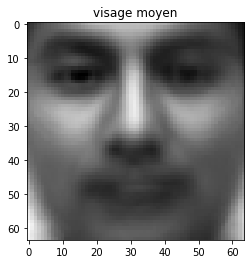

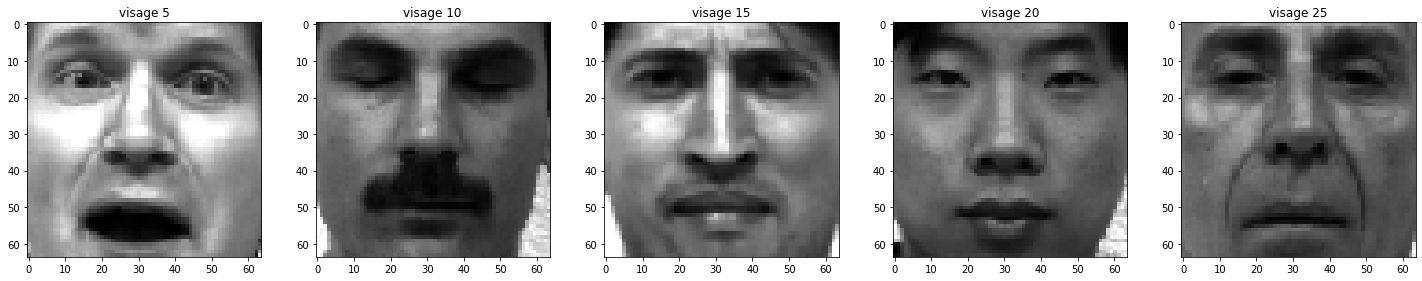

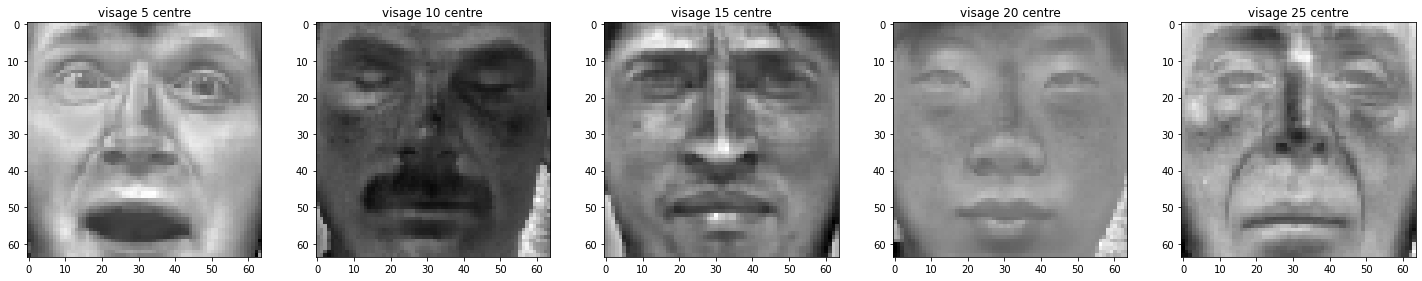

In [6]:
centered = centeredFaces(X_train)
print(centered.shape)

plt.imshow(deflat(meanFaces(X_train)).T)
plt.gray()
plt.title("visage moyen")
plt.show()

n=5
fig=plt.figure(figsize=(25,25))
for i in range(1,n+1):
    fig.add_subplot(n,n,i)
    plt.imshow(deflat(X_train[:,i*5]).T)
    plt.title("visage " + str(i*5))
    plt.gray()
plt.show()

fig=plt.figure(figsize=(25,25))
for i in range(1,n+1):
    fig.add_subplot(n,n,i)
    plt.imshow(deflat(centered[:,i*5]).T)
    plt.title("visage " + str(i*5) + " centre")
    plt.gray()
plt.show()

# Exercise 2: Computation of Eigenfaces (PCA)


The method developed by Turk and Pentland defines the eigenfaces as the main axes obtained by carrying out a principal component analysis (PCA) of the vectors associated with the reference faces. 
**The eigenfaces are thus the eigenvectors of the covariance matrix $\mathbf X_c\mathbf X_c^\top$**, of size $d\times d$ , where the matrix $\mathbf X_c$ of the same size as $\mathbf X$ represents all the centered faces:
$$\mathbf X_c= \left[ x_0-x_{moy}, \cdots x_{n-1}-x_{moy}\right]$$
Each line of $\mathbf X_c$ corresponds to a pixel $p$, each column of $\mathbf X_c$ corresponds to a reference face of index $k^.

Rather than using eigenvalue decomposition, we will use singular value decomposition (SVD). 
The SVD decomposes the matrix $\mathbf X_c$ of size $d\times d$ into 3 matrices $\mathbf U$, $\mathbf S$, $\mathbf V$ such as :

$$\mathbf X_c=\mathbf U \mathbf S\mathbf V^\top$$

where $\mathbf U$ and $\mathbf V$ are orthogonal matrices ($\mathbf U \mathbf U^\top=\mathbf U^\top \mathbf U=\mathbf I_d^d$ and $\mathbf V \mathbf V^\top=\mathbf V^\top \mathbf V=\mathbf I_d^n$) of respective sizes $d\times d$ and $n\times n$, and $\mathbf S$ is a matrix of size $d\times n$ with null elements everywhere except on the main diagonal.

This decomposition has the following properties:
- the columns of $\mathbf V$ are the eigenvectors of $\mathbf X_c^\top\mathbf X_c$, 
- the columns of $\mathbf U$ are the eigenvectors of $\mathbf X_c\mathbf X_c^\top$,
- the matrix $\mathbf S$ is diagonal. The diagonal represents the singular values of $\mathbf X_c$, equal to the square roots of the eigenvalues $\lambda_k$ of $\mathbf X_c^\top\mathbf X_c$ and
    $\mathbf X_c\mathbf X_c^\top$. 

With Numpy, the SVD can be calculated by this way:

`U, S, V = numpy.linalg.svd(Xc)`

In our case, $n<d$, and the eigenvalues $\lambda_k$ of $\mathbf X_c\mathbf X_c^\top$ are therefore all null for $k>n$.
We will not need the associated eigenvectors $k>n$. 
The `svd` function has a fast mode, which calculates only the eigenvectors corresponding to the columns of the matrix passed as argument:

`U, S, V = svd(Xc, full_matrices=False)`


This command returns the matrices $\mathbf U$ and $\mathbf V$, of size $d\times n$ and $n\times n$, and the matrix $\mathbf U$ matrix has been truncated, only the first $n$ columns are retained:
$$\mathbf U= \left[ u_1, \cdots, u_n\right]$$
Finally `S` is a vector of size $n$ and represents the diagonal matrix $\mathbf S$.

1. Write a function `eigenfaces(Xc)` which returns a t-uple consisting of the $\mathbf U$ matrix of eigenfaces, computed from a centered database $\mathbf X_c$, and the table of associated eigenvalues.
        

In [7]:
def eigenfaces(Xc):
    """ Array[d,n] -> Array[d,n]*Vector[n] """
    U, S, _ = np.linalg.svd(Xc, full_matrices=False)
    return U.T, S

2. Use this function to calculate $\mathbf U$ and $\mathbf S$. Normalize then the eigenvalues so that their sum is equal to 1.


In [8]:
Xc = centeredFaces(X_train)
U, S = eigenfaces(Xc)
S = (S*S)/np.sum(S*S)
print(U.shape)
print(S.shape)

(90, 4096)
(90,)


3. Display the average face and the first 15 eigenfaces (see figure 4, use the `plt.subplot()` function).
   and their associated own values. Give your interpretation of the eigenfaces images?

![Figure_4.png](./figs/Figure_4.png)
<center>Figure 4: the 15 first eigenfaces</center>

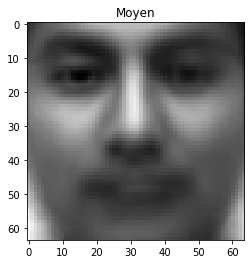

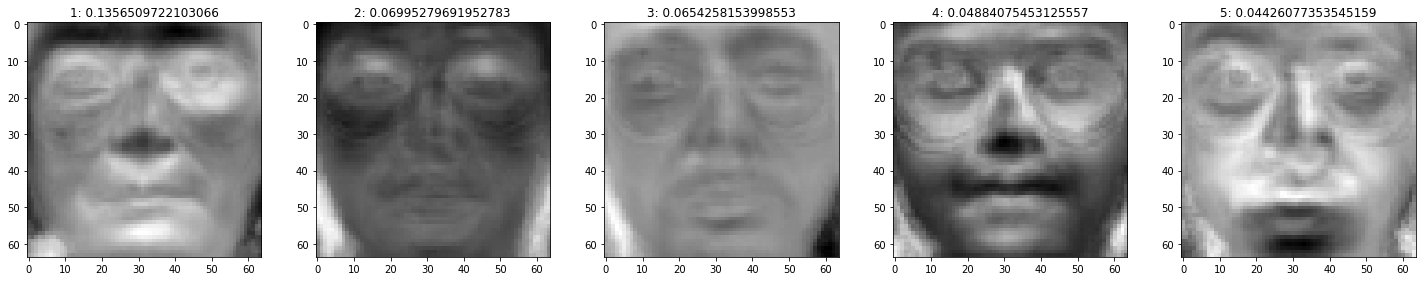

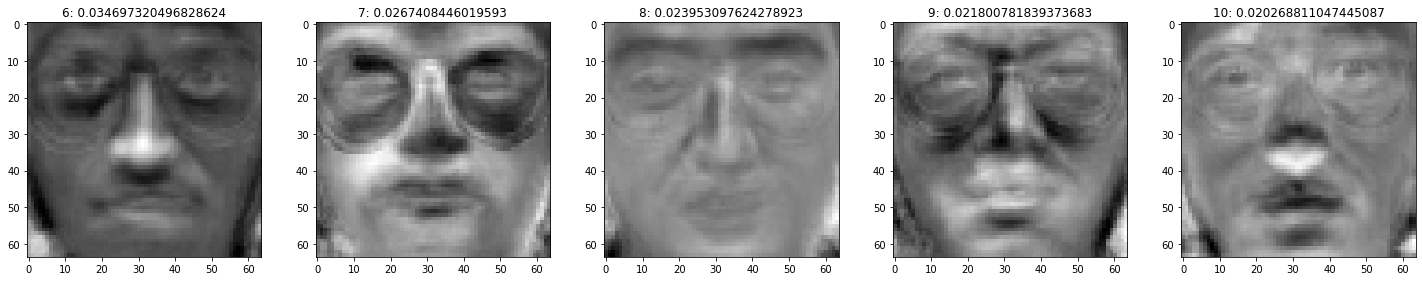

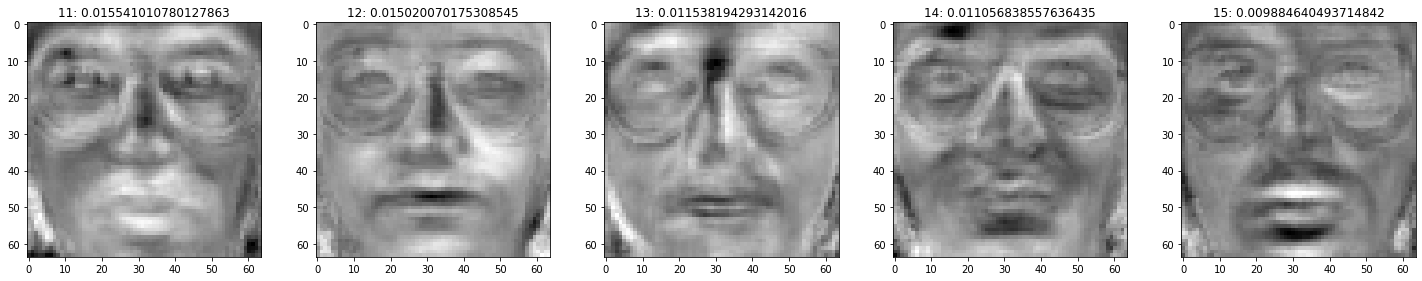

In [9]:
plt.imshow(deflat(meanFaces(X_train)).T)
plt.title("Moyen")
plt.show()

fig=plt.figure(figsize=(25,25))
for i in range(1,6):
    fig.add_subplot(5,5,i)
    plt.imshow(deflat(U[i]).T)
    plt.title(str(i) + ": " + str(S[i]))
    plt.gray() 
plt.show()
fig=plt.figure(figsize=(25,25))
for i in range(6,11):
    fig.add_subplot(5,5,i)
    plt.imshow(deflat(U[i]).T)
    plt.title(str(i) + ": " + str(S[i]))
    plt.gray() 
plt.show()
fig=plt.figure(figsize=(25,25))
for i in range(11,16):
    fig.add_subplot(5,5,i)
    plt.imshow(deflat(U[i]).T)
    plt.title(str(i) + ": " + str(S[i]))
    plt.gray() 
plt.show()

In [10]:
# Les eigenfaces sont des bases depuis lesquelles tous les visages peuvent être reconstruits. Chaque visage est sensé
# representer une caracteristique. Certains ont des contours de lunettes très forts alors que certains represente plus
# une endroit du visage comme les yeux ou la bouche. Ici la dixième image semble representer des yeux surpris alors que
# l'image 7 semble representer le fait d'avoir des lunettes.

4. Plot the curve of the cumulative sum of the normalized eigenvalues (see Figure 5 for the expected result), to see how much variation is captured by the first $K$ eigenfaces. How many eigenfaces are needed to obtain a good reconstruction?    
    
![Figure_5.png](./figs/Figure_5.png)
<center>Figure 5: cumulative sum of eigenvalues</center>

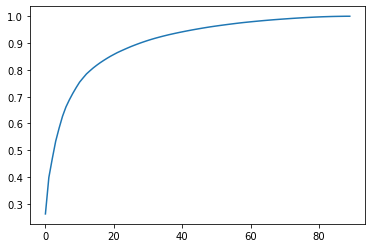

In [11]:
plt.plot(np.cumsum(S))
plt.show()

In [12]:
# On voit qu'on a de tres bon resultat jusqu'a la dimension 20, la convergence est ensuite assez lente.

# Exercise 3: projection in the subspace of faces


In the following, we use a reduced number of eigenfaces/eigenvectors. The vectorial space of faces, $\mathbf W_K$, is spanned by the basis formed with the $K$ first eigenvectors:

$$\mathbf W_K = \left[ u_1, ..., u_K\right]$$

Note that the set of columns of $W_K$ is an orthonormal basis, so $\mathbf W^\top_K\times \mathbf W_K=\mathbf I_d^K$.

The **projection of a face image $x$ in the face subspace** is simply done by subtracting from $x$ the average face and applying the scalar product with each eigenvector. 
This gives the coordinates of the image $x$ in the subspace of faces, which is of dimension $K$.

Each face therefore has several representations:
-   the original image, a vector $x \in \mathbb{R}^n$
-   the coordinates of the projected image $z$ in the basis of eigenfaces,
    $\left\lbrace a_h\right\rbrace$,
    $h \in\left\lbrace 1;K\right\rbrace$ (subspace of faces):
    $$z = \mathbf W_K^\top (x-x_{average})$$
-   its reconstruction in the original space $\mathbb{R}^n$,
    $\tilde{x}$:
    $$\tilde{x} = x_{average} + \sum_h a_h u_h = x_{moy} + \mathbf W_K  z$$

**The reconstruction error is defined** as the distance between a face $x$ and the associated reconstruction $\tilde x$:
$$E^{recons}(x) =\|x-\tilde{x}\|_2  = \sqrt{\sum_{p=1}^n \left( x(p) - \tilde{x}(p)\right) ^2}$$

1. Write a function `projEigenfaces()` which takes as arguments a face, $x$, the average face, $x_{average}$, the subspace of faces $\mathbf W$, the number of eigenfaces $K$, and  computes the coordinates of projected face $z$ in the subspace $\mathbf W_K$ of faces.    

In [13]:
def projEigenface(x, x_mean, W, K):
    """ Vector[d]*Vector[d]*Array[d,n]*int -> Vector[K] """    
    return W[:K] @ (x-x_mean)

2.  Write a function `reconstruct()` which takes as arguments a projected face, $z$, the average face, $x_{average}$, and the truncated subspace of face, $W$ and $K$, and computes the coordinate of $x$ in the original space ($\mathbb{R}^n$).    

In [14]:
def reconstruct(z, x_mean, W, K):
    """Vector[K]*Vector[d]*Array[d,n]*int -> Vector[d] """
    return x_mean + W[:K].T @ z

3.  Write a function  `errorReconstruct()` which computes the recontruction error between $\tilde{x}$ and $x$.

In [15]:
def errorReconstruct(x_r, x):
    """Vector[d]*Vector[d] -> double """
    return np.sqrt(np.sum((x-x_r)**2))

4.  Write a function `affiche_Reconstruction()` which displays:
    - the original face $x$,
    - the reconstructed faces $x_r$ for various values of $K$ (for instance, $K =$ 5, 10, 25, 50, 90).

In [16]:
def affiche_reconstruction(x, x_moy, W, listK, display=True, gif=False):
    """ Vector[d]*Vector[d]*Array[d,n]*list[int] -> NoneType """
    errors = []
    recons = []
    if display:
        fig=plt.figure(figsize=(5,5))
        fig.add_subplot(2,2,1)
        plt.imshow(deflat(x).T)
        plt.title("Ground truth")
        fig.add_subplot(2,2,2)
        plt.imshow(deflat(x_moy).T)
        plt.title("Mean face")
        plt.show()
        fig=plt.figure(figsize=(25,25))
    n=len(listK)
    for i, K in enumerate(listK):
        z = projEigenface(x, x_moy, W, K)
        x_r = reconstruct(z, x_moy, W, K)
        recons.append(x_r)
        err = errorReconstruct(x_r, x)
        errors.append(err)
        if display:
            fig.add_subplot(n,n,i+1)
            plt.imshow(deflat(x_r).T)
            plt.title("Error:"+ str(int(err)) + ", K:" + str(K))
    if display:
        plt.show()
    if gif :
        _ = make_gif(np.array(recons))
    return errors

5.  Test the previous functions by displaying the projection/reconstruction result for several images (from the training and test bases). Figure 6 shows the result of the reconstruction for image 50 of the training base. For image 55 of the training base, what is the reconstruction error for $K=n=90$? Is the image identical to its reconstruction? Same question for image 17 of the test base.

![Figure_6.png](./figs/Figure_6.png)
<center>Figure 6: example of reconstruction for image number 50</center>

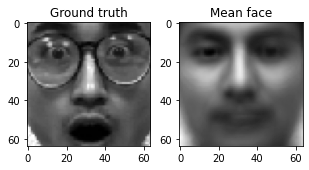

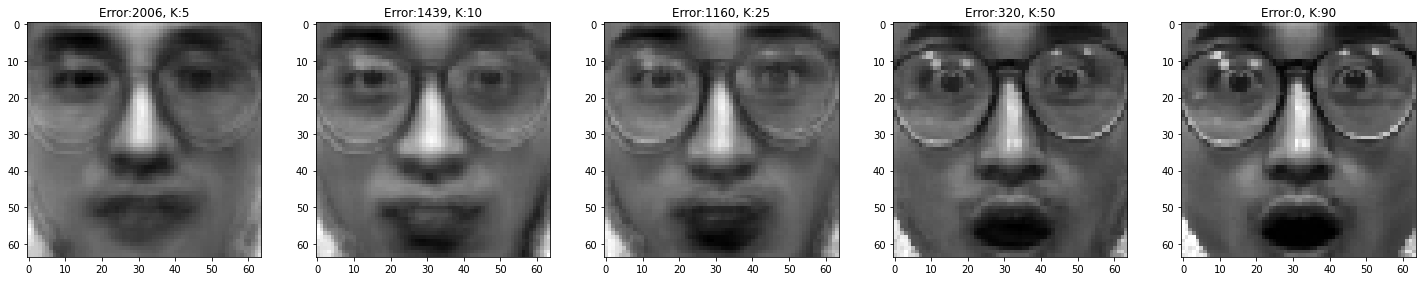

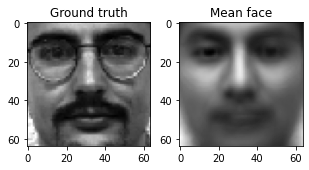

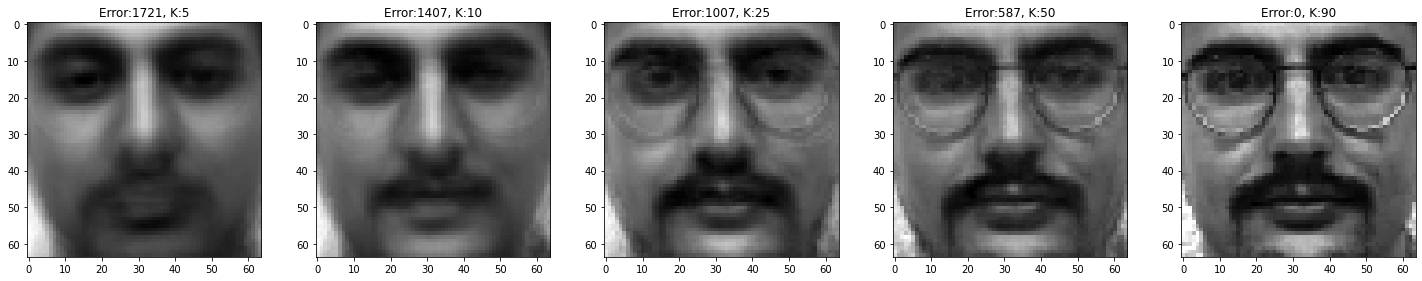

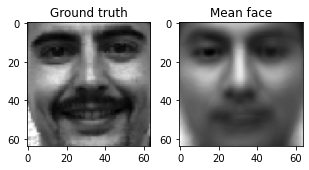

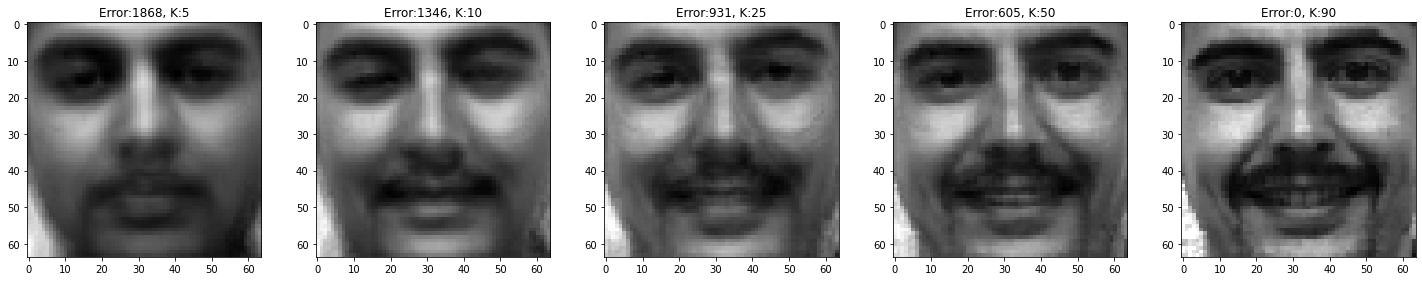

In [17]:
train = meanFaces(X_train)
listK = [5, 10, 25, 50, 90]
for i in range(3):
    affiche_reconstruction(X_train.T[i+47], train, U, listK)

6. Is there a difference between the reconstructions of the faces from the training base and those from the test base? Why?

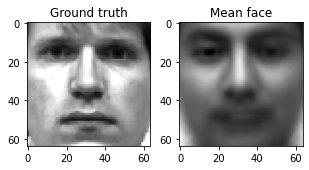

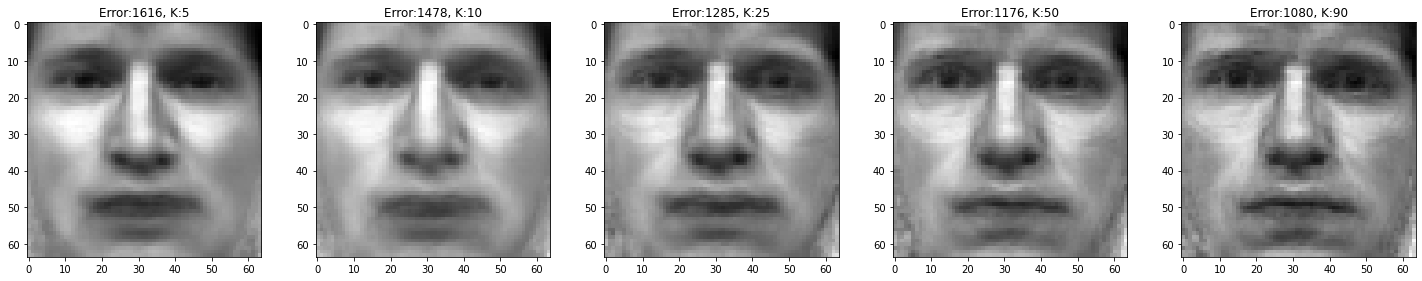

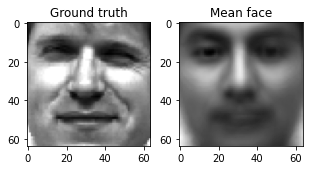

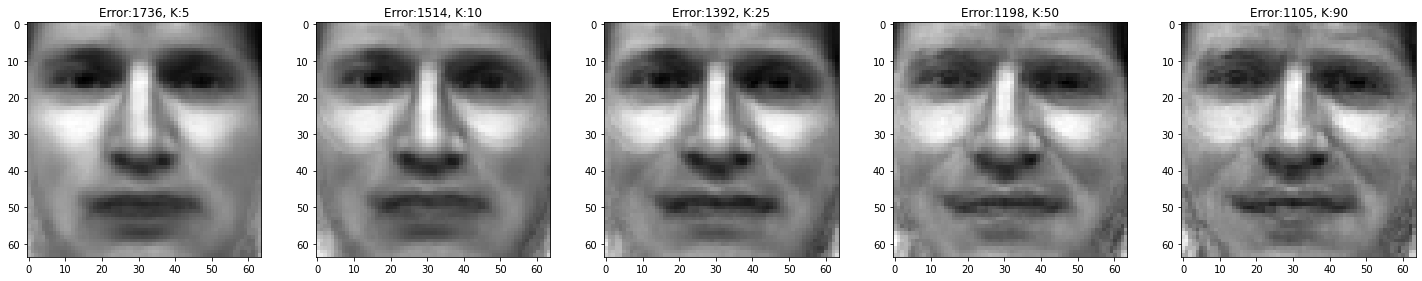

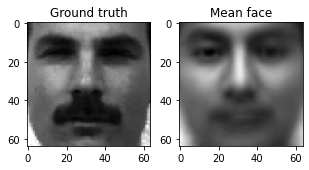

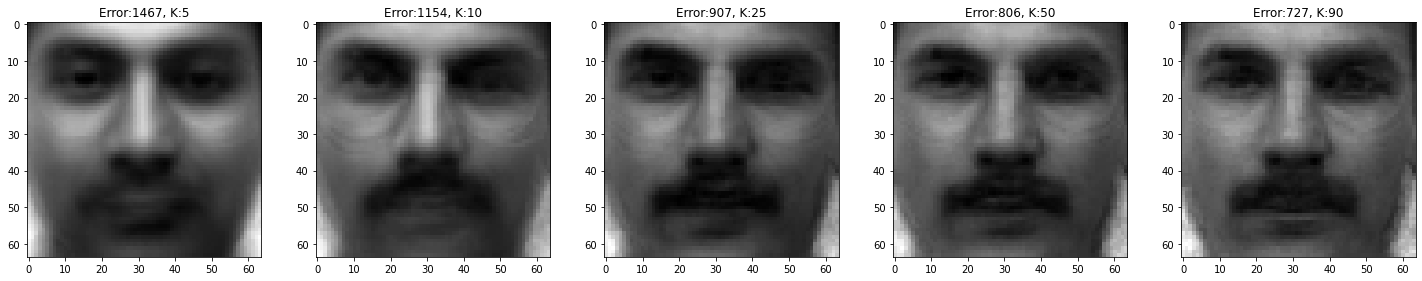

In [18]:
train = meanFaces(X_train)
listK = [5, 10, 25, 50, 90] 
for i in range(3):
    affiche_reconstruction(X_test.T[i], train, U, listK)

In [19]:
# Il y a une difference car nous avons fait notre "entrainement" à partir du visage moyen calcule à partir du train.

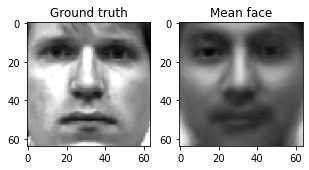

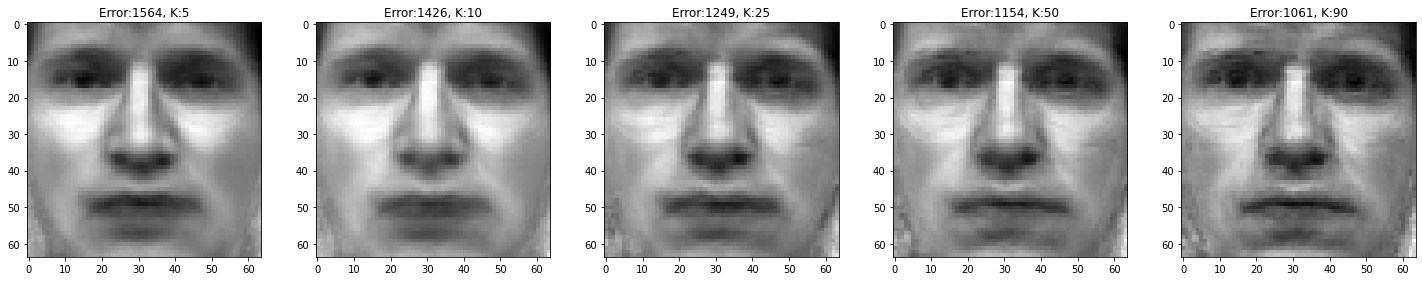

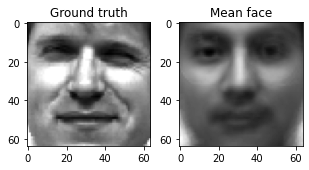

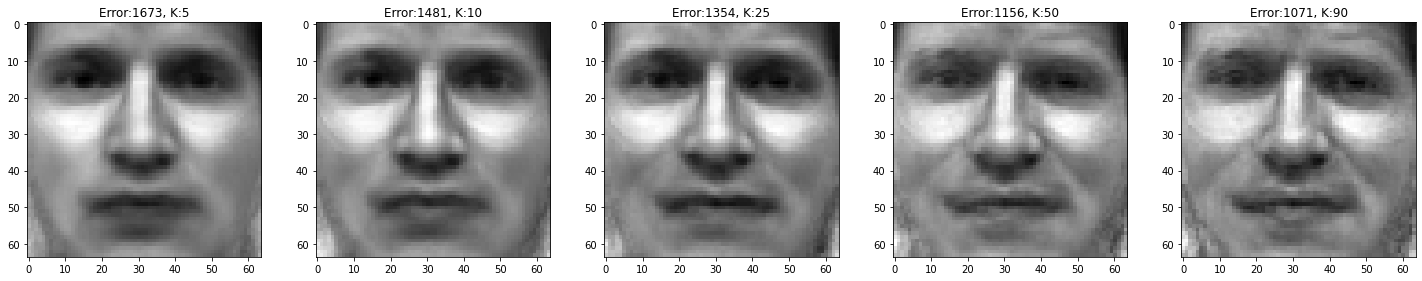

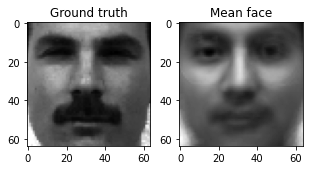

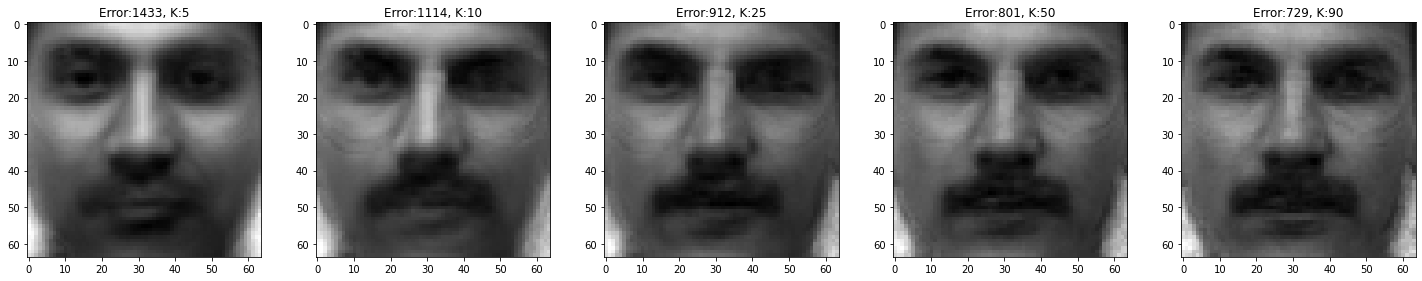

In [20]:
test = meanFaces(X_test) # Ce n'est pas seulement le visage moyen qui compte mais aussi les eigenfaces et surtout la variable U qui a etait cree a partir de X_train.
listK = [5, 10, 25, 50, 90]
for i in range(3):
    affiche_reconstruction(X_test.T[i], test, U, listK)

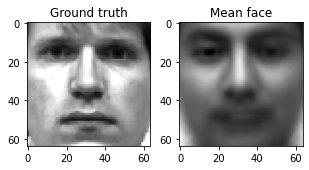

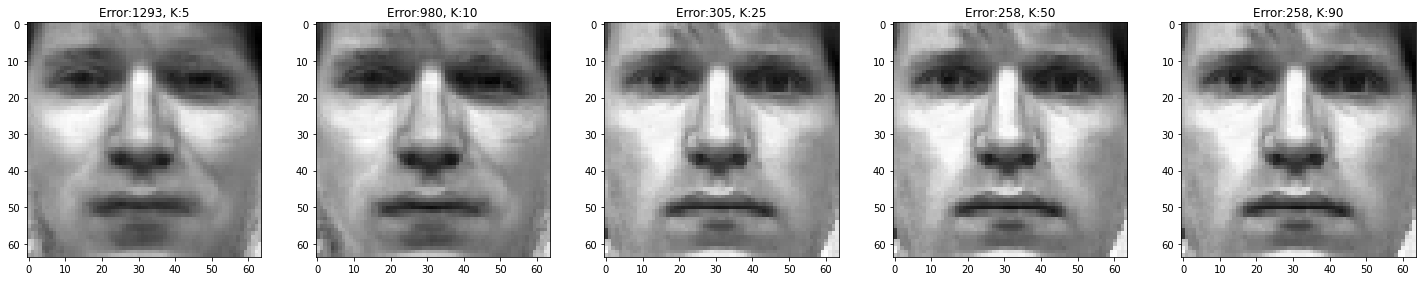

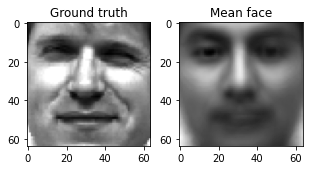

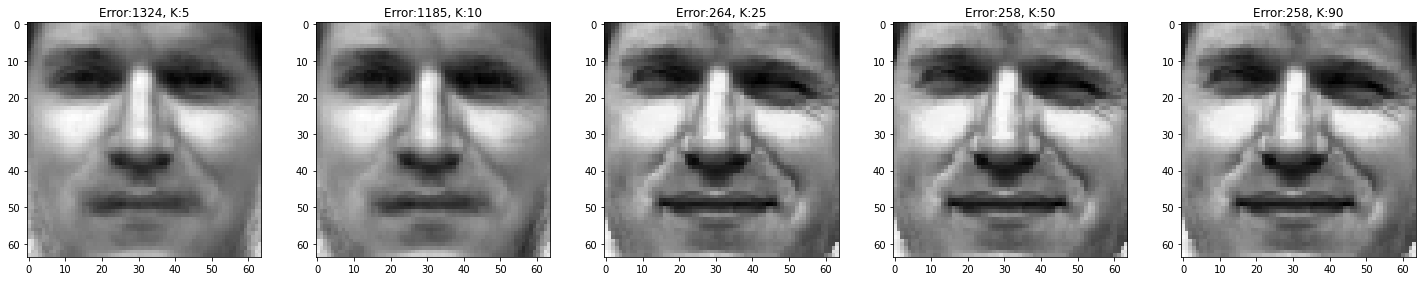

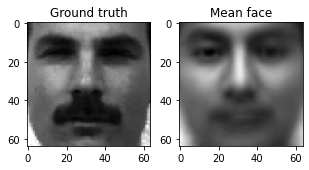

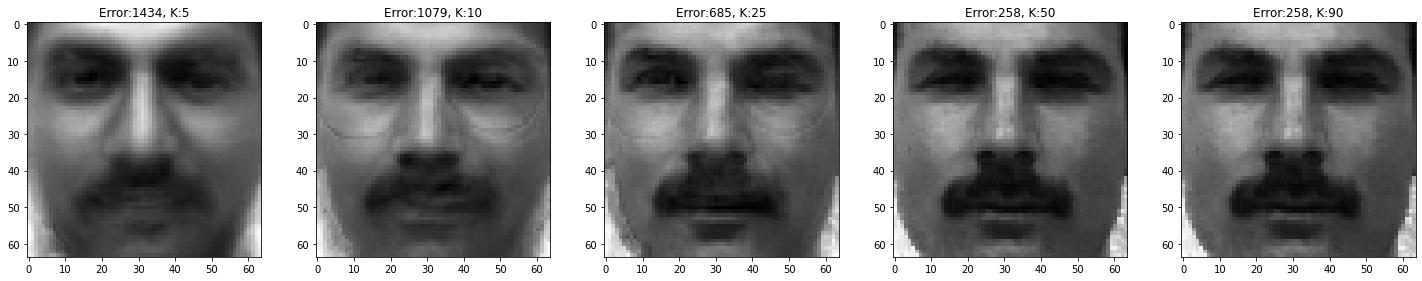

In [21]:
Xc_t = centeredFaces(X_test) 
U, S = eigenfaces(Xc_t) # On peut voir qu'en prenant les valeurs U calcule a partir des donnes de test on obtient de meilleur scores mais ce n'est pas encore parfait.
train = meanFaces(X_train)
listK = [5, 10, 25, 50, 90]
for i in range(3):
    affiche_reconstruction(X_test.T[i], train, U, listK)

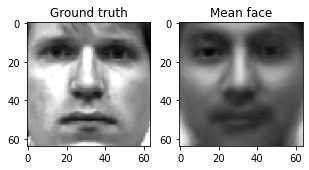

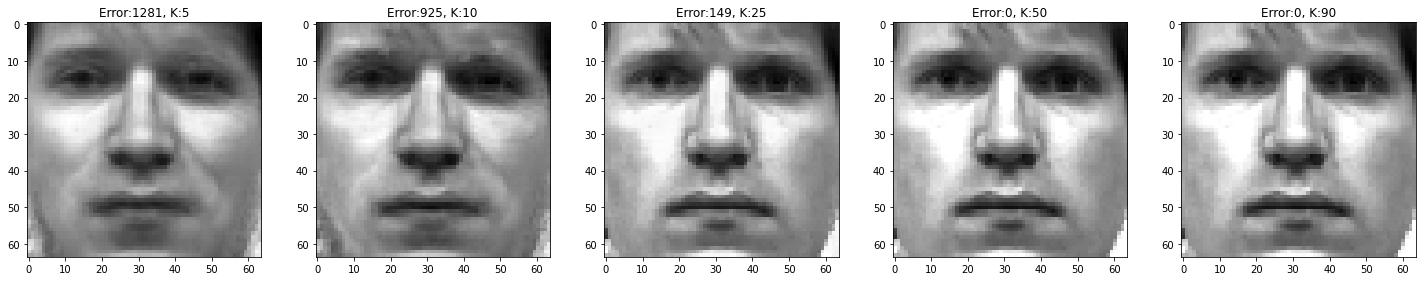

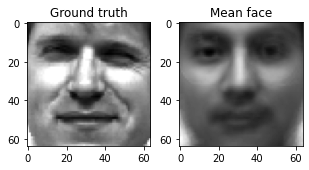

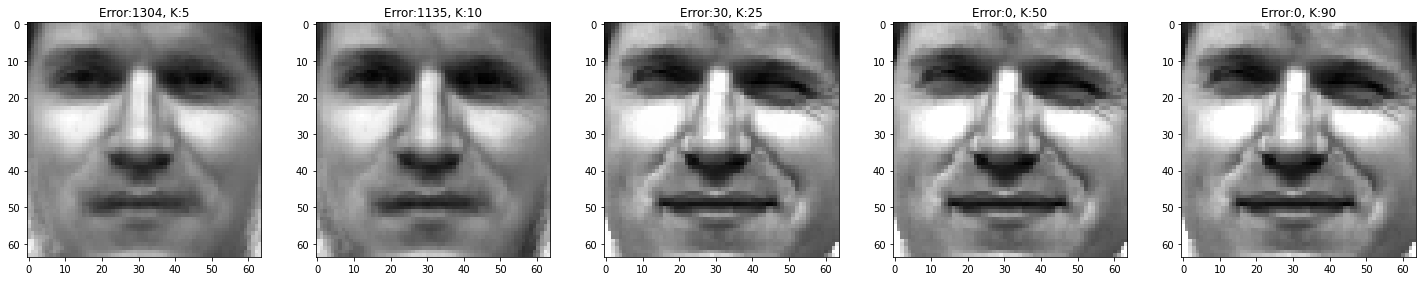

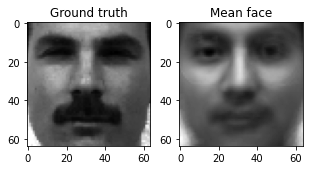

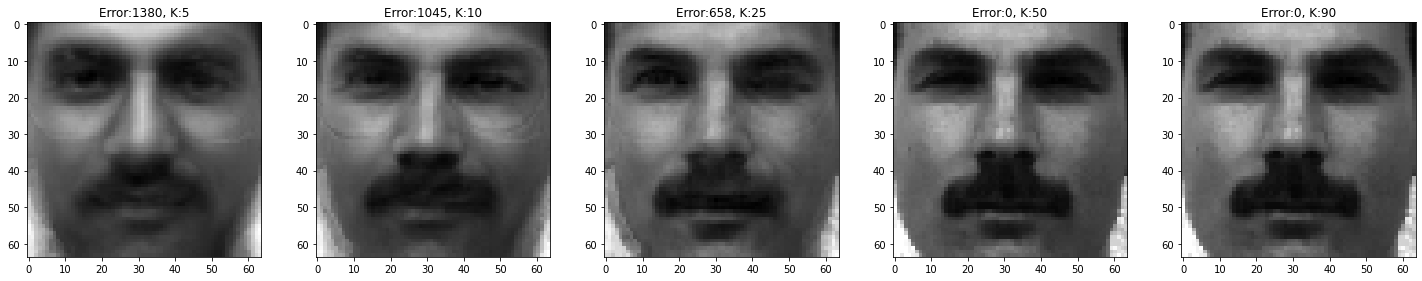

In [22]:
Xc_t = centeredFaces(X_test) 
U, S = eigenfaces(Xc_t) # Pour que ce soit parfait sur les donnees de test il faut creer le U a partir du jeu de test mais aussi le visage moyen.
test = meanFaces(X_test)
listK = [5, 10, 25, 50, 90]
for i in range(3):
    affiche_reconstruction(X_test.T[i], test, U, listK)

7. Bonus question : Plot the evolution of the average error of reconstruction of test faces when $K$ varies from 1 to $N$. Is this evolution consistent with the cumulative sum previously calculated (exercise 2, question 4)?

In [23]:
Xc = centeredFaces(X_train) # On repart sur la configuration de base avec un train sur les donnees de train
U, S = eigenfaces(Xc)
train = meanFaces(X_train)
N = U.shape[0]
listK = np.arange(N)
err_train = []
err_test = []

for i in range(X_train.shape[1]):
    err_train.append(affiche_reconstruction(X_train.T[i], train, U, listK, display=False))
for i in range(X_test.shape[1]):
    err_test.append(affiche_reconstruction(X_test.T[i], train, U, listK, display=False))
    
mean_err_train = np.mean(err_train, axis=0)
mean_err_test = np.mean(err_test, axis=0)

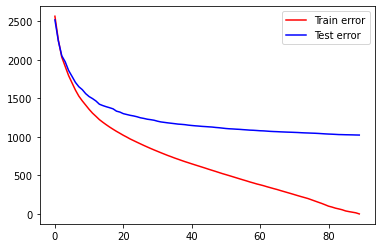

In [24]:
plt.figure()
plt.plot(mean_err_train, color='r')
plt.plot(mean_err_test, color='b')
plt.legend(("Train error","Test error"))
plt.show()

In [25]:
# L'evolution de l'erreur en train semble logique, plus on prend de dimension du vecteur U, plus on a d'information et plus 
# on est precis sur la reconstruction de l'image. On voit qu'on overfit lorsque l'on compare a l'erreur en test.
# On voit que comme pour la somme cumule precedemment plot, on a une convergence rapide jusqu'a une valeur K = 20 environ,
# puis une convergence beaucoup plus lente jusqu'a la valeur maximum K = 90. On peut en deduire que K = 20 peut etre une
# bonne valeur a utiliser afin de diminuer le nombre de dimension de l'image afin de les discriminer lors de la partie
# reconnaissance d'image.

8. Bonus : Petit gif pour la reconstruction

In [26]:
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

def make_gif(arr):
    fig = plt.figure()
    images = []
    for i in range(arr.shape[0]):
        img = plt.imshow(deflat(arr[i]).T)
        images.append([img])
    ani = animation.ArtistAnimation(fig, images, interval=50, blit=True, repeat_delay=500)
    writer = PillowWriter(fps=8)
    ani.save("gifs/gif_recons"+str(CPT)+".gif", writer=writer)
    plt.close()

In [27]:
CPT = 0
listK = np.arange(N)
err = affiche_reconstruction(X_train[:,1], train, U, listK, display=False, gif=True)
CPT += 1

![Figure_7.png](./gifs/gif_recons0.gif)

# Exercise 4: Face recognition and identification

Each reference face $x_k^{train}$ has an identity associated with it, in the form of a $id^{train}(k)$ number. In this section we try to identify a face $x^{test}$ from the reference faces.

The simplest method is to compare the projection $z^{test}$ of the test face $x^{test}$ with the projection $z_k^{train}$ of each reference image $x_k^{train}$ (see Figure 7). The dissimilarity between the two projected vectors is quantified by the distance in subspace $E_k(x^{test})$:

$$E_k(x^{test}) =||z^{test}-z_k^{train}||_2$$

![Figure_7.png](./figs/Figure_7.png)
<center>Figure 7: Projection of an image $J$ in the subspace of faces and comparison with a reference face $I_k$, in case $K=2$.<center>

This distance is evaluated for each reference face, we can determine the reference face $x_k^{train}$ closest to the test face $x^{test}$. **Its identifier $id^{train}(k)$ then allows for the recognition of the tested face.**


1.  What is the advantage of calculating the distance $E_k(x^{test})$ in the subspace of faces rather than in the original space?

In [28]:
# C'est beaucoup plus pratique de calculer cette distance car il y a beaucoup moins de dimensions dans le sous espace des visages.
# C'est aussi bien plus interessant car on calcule l'erreur sur les dimensions etant les plus utile pour discriminer les visages.
# On evite ainsi de fausser notre calcule de l'erreur en calculant des distances bruites ou inutiles.

2.  Write a function ``computeMatDist()`` which takies as arguments the training set of centered faces, $\mathbf Xc_{train}$ of size $d\times N_{train}$, the test set of centered faces, $\mathbf Xc_{test}$ of size $d\times N_{test}$, the subspace of eigenfaces, $\mathbf W$ and $K$, and computes the matrix $D$ of distance between a face of the test set and a face of the training set. $D$ is of size $N_{test} \times N_{train}$.

In [29]:
def calculMatDist(X_train, X_test, W, K):
    """ Array[d,n]*Array[d,m]*Array[d,n]*int -> Array[m,n]"""
    n  = X_train.shape[1]
    nt = X_test.shape[1]
    matDist = np.zeros((n, nt))
    x_mean  = meanFaces(X_train)
    xt_mean = meanFaces(X_test)
    for i in range(n):
        for j in range(nt):
            proj  = projEigenface(X_train.T[i], x_mean , W, K)
            projt = projEigenface(X_test.T [j], xt_mean, W, K)
            matDist[i][j] = np.sqrt(np.sum((proj-projt)**2))
    return matDist

3.  Write a function `identification()` which takes as argument the matrix of distances $D$ (computed by the previous function), the vector of identification of the training set $id^{train}$, and returns the identificaton vector $\hat{id}^{test}$ of size $N_{test}$ of the elements of the test set.

In [30]:
def identification(D, id_train):
    """ Array[m,n]*Array[n] -> Array[m]"""
    return np.array(id_train[np.argmin(D, axis=0)])

4. Compute for $K=30$ the identification rate by comparing $\hat{id}^{test}$ to $id^{test}$ labels. Then vary $K$, and plot the curve of the number of recognized faces as a function of $K$. Explain the shape of the curve obtained. Which value of $K$ can be taken to have a good recognition and a low calculation time?

In [31]:
Xc  = centeredFaces(X_train)
Xct = centeredFaces(X_test)
U, S = eigenfaces(Xc)
K = 30

D = calculMatDist(X_train, X_test, U, K)
id_t = identification(D, id_train)
val = np.where(id_t==id_test, 1, 0)
acc = val.sum()/val.size
print("Accuracy : ", acc*100, "%")

Accuracy :  90.0 %


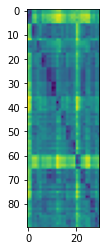

In [32]:
plt.imshow(D,cmap="viridis")
plt.show()

5.  **Bonus question**: for $K=30$, calculate for each face of the training set its distance in the subspace $\mathbf W_K$ from each element of the training set. Display the result as the image of a matrix. Comment the result.

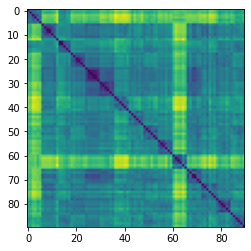

In [33]:
D = calculMatDist(X_train, X_train, U, 30)
plt.imshow(D,cmap='viridis')
plt.show()

In [34]:
# La matrice est symetrique car les visages sont similaires sur les deux axes vu qu'on a creer la matrice avec X_train et X_train.
# Cependant certains visages sont quand meme assez differents suivant l'expression ou le fait que la personne porte des lunettes.

6. **Bonus question**: What are the minimal and maximal distances between two faces of the same category (i.e. same person)? Between two faces of different categories? If we want to choose a threshold $\theta$  to detect the presence of an unknown face, which indications do the previous min/max values give us?

In [35]:
img_per_pers = 6
n = D.shape[0]
clusters = np.zeros((n//img_per_pers,img_per_pers))
mins = []
maxs = []

tmp_D = D.copy()

for i in range(1,n//img_per_pers+1):
    sort = np.sort((tmp_D[0:i*img_per_pers,0:i*img_per_pers]).ravel())
    sort = sort[sort != 0] # Supprime les 0 des diagonales
    maxs.append(sort[-1])
    mins.append(sort[0])
    tmp_D[0:i*img_per_pers,0:i*img_per_pers] = 0 # Met le cluster a pour ne pas influer sur le prochain cluster

mins = np.array(mins)
maxs = np.array(maxs)

print(mins.shape) # Un min et max par personne
print(maxs.shape)

(15,)
(15,)


2
10


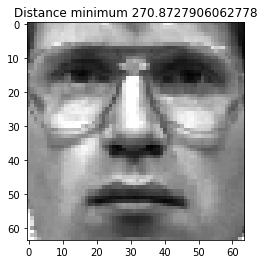

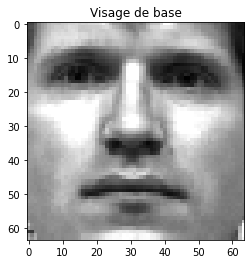

In [36]:
result1 = np.where(mins == mins.min())
result2 = np.where(maxs == maxs.max())

print(result1[0][0])
print(result2[0][0])

plt.imshow(deflat(X_train[:,0]).T)
plt.title("Distance minimum " + str(mins.min()))
plt.show()
plt.imshow(deflat(X_train[:,result1[0][0]]).T)
plt.title("Visage de base")
plt.show()

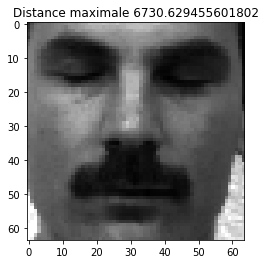

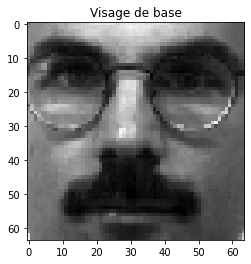

In [37]:
plt.imshow(deflat(X_train[:,result2[0][0]]).T)
plt.title("Distance maximale " + str(maxs.max()))
plt.show()
plt.imshow(deflat(X_train[:,6]).T)
plt.title("Visage de base")
plt.show()

In [38]:
# Ces valeurs peuvent être interessantes car on peut detecter le visage d'une nouvelle personne si la distance entre
# le visage de cette nouvelle personne est plus elevé que les distances maximales par personne.
# On peut aussi eliminer l'hypothese d'une nouvelle personne si le visage a une erreur minimale plus basse
# que la distance minimale d'un des visages de la base de données.

# Exercise 5: face/non-face classification

Until now, we focused on comparing facial images with each other. But the method provides information that we have not yet used. In particular, the reconstruction error can be used to verify that an image is indeed an image of a face. When an image contains something other than a face (image of a flower, a person seen in its entirety, a random image...), we can say that it is a non-face (database *noface*).

![figure8](./figs/Figure_8.png)
<center>Figure 8: illustration of possible cases for classifying an image: case 1,2) $Z$ close to subspace: it is a face 3,4) $Z$ far from subspace: it is not a face, 1) $Z$ is an identified face, case 2) $z$ is an unknown face, case 3) risk of identifying $Z$ as a face when it is not.

1.  For each set: training set, test set, and *noface* set, plot the reconstruction error of all the images of each set (this provides 3 plots). Compute the minimal, average, maximal errors for the three sets. Which conclusion can be drawn?

In [39]:
K = 30

error_noface = np.zeros((X_noface.shape[1]))
for i in range(len(error_noface)):
    x = X_noface[:,i]
    z = projEigenface(x,train,U,K)
    r = reconstruct(z,train,U,K)
    error_noface[i] = errorReconstruct(x,r)
    
error_test = np.zeros((X_test.shape[1]))
for i in range(len(error_test)):
    x = X_test[:,i]
    z = projEigenface(x,train,U,K)
    r = reconstruct(z,train,U,K)
    error_test[i] = errorReconstruct(x,r)

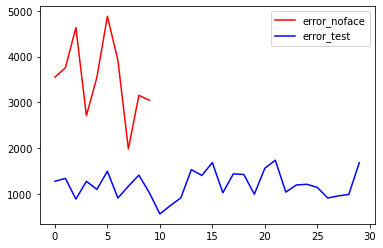

In [40]:
plt.plot(error_noface, color='r')
plt.plot(error_test, color='b')
plt.legend(("error_noface","error_test"))
plt.show()

In [41]:
mean_noface = np.mean(error_noface)
min_noface = np.min(error_noface)
max_noface = np.max(error_noface)

mean_test = np.mean(error_test)
min_test = np.min(error_test)
max_test = np.max(error_test)

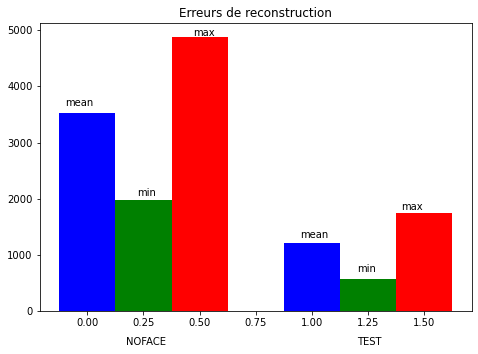

In [42]:
hist1 = [mean_noface, mean_test]
hist2 = [min_noface, min_test]
hist3 = [max_noface, max_test]
data = [hist1,hist2,hist3]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
X = np.arange(2)
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
plt.title("Erreurs de reconstruction")
plt.text(0.17, -600, "NOFACE")
plt.text(1.20, -600, "TEST")
plt.text(-0.1, 3650, "mean")
plt.text(0.22, 2050, "min")
plt.text(0.47, 4900, "max")
plt.text(0.95, 1300, "mean")
plt.text(1.20, 700, "min")
plt.text(1.40, 1800, "max")
plt.show()

2. Visualize the reconstruction error by displaying the original image and the reconstructed image for 10 images of the face database, and for the 10 images of the noface database. Comment the results.

In [43]:
CPT = 1
n=9
test = meanFaces(X_test)
listK = np.arange(N)
rand = np.random.randint(X_test.shape[1], size=(n))
errors_test = []
for i in rand:
    err = affiche_reconstruction(X_test[:,i], test, U, listK, display=False, gif=True)
    errors_test.append(err)
    CPT += 1

![Figure_7.png](./gifs/gif_recons1.gif)
![Figure_7.png](./gifs/gif_recons2.gif)
![Figure_7.png](./gifs/gif_recons3.gif)
![Figure_7.png](./gifs/gif_recons4.gif)
![Figure_7.png](./gifs/gif_recons5.gif)
![Figure_7.png](./gifs/gif_recons6.gif)
![Figure_7.png](./gifs/gif_recons7.gif)
![Figure_7.png](./gifs/gif_recons8.gif)
![Figure_7.png](./gifs/gif_recons9.gif)

In [44]:
CPT = 10
errors_noface = []
rand = np.random.randint(X_noface.shape[1], size=(n))
for i in rand:
    err = affiche_reconstruction(X_noface[:,i], test, U, listK, display=False, gif=True)
    errors_noface.append(err)
    CPT += 1

![Figure_7.png](./gifs/gif_recons10.gif)
![Figure_7.png](./gifs/gif_recons11.gif)
![Figure_7.png](./gifs/gif_recons12.gif)
![Figure_7.png](./gifs/gif_recons13.gif)
![Figure_7.png](./gifs/gif_recons14.gif)
![Figure_7.png](./gifs/gif_recons15.gif)
![Figure_7.png](./gifs/gif_recons16.gif)
![Figure_7.png](./gifs/gif_recons17.gif)
![Figure_7.png](./gifs/gif_recons18.gif)

In [45]:
errors_test = np.array(errors_test)
print(errors_test.shape)

errors_noface = np.array(errors_noface)
print(errors_noface.shape)

(9, 90)
(9, 90)


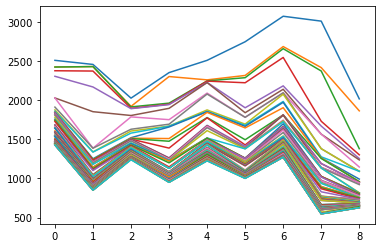

In [46]:
plt.plot(errors_test)
plt.show()

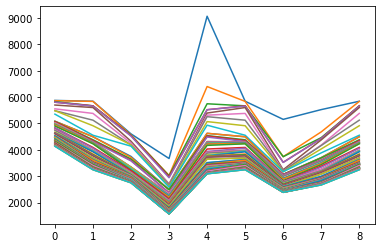

In [47]:
plt.plot(errors_noface)
plt.show()

In [48]:
# On voit qu'il n'est pas possible de reconstruire les images de noface en ayant un vecteur U et un meanFaces entraine sur X_train.
# C'est logique car les visages ne ressemblent pas du tout aux objets de la base de donnees noface.
# Lorsque l'on veut reconstruire des images noface on tend vers des images ressemblant a des eigenfaces.
# Ces images sont les eigenfaces qui sont les plus proches (erreurs minimes) des objets dans le plan.
# On observe que les erreurs sont deux fois plus eleves lorsque l'on essaie de reconstruire des noface.

# Exercices supplementaires : MLP Face recognition

In [49]:
import tensorflow as tf
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

In [50]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.3)
X = lfw_people.images
Y = lfw_people.target
print(X.shape)
print(Y.shape)

(1288, 37, 28)
(1288,)


In [51]:
N_IMG, W, H = X.shape

In [52]:
X = X.reshape(N_IMG,W*H)

In [53]:
LABELS = lfw_people.target_names

In [54]:
N_CLASS = len(np.unique(Y))
NB_NEURONS = 128
EPOCHS = 30

In [55]:
X_train, X2, Y_train, Y2 = train_test_split(X, Y, test_size=0.2)
X_test, X_valid, Y_test, Y_valid = train_test_split(X2, Y2, test_size=0.5)

In [56]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(1030, 1036)
(129, 1036)
(129, 1036)


In [57]:
def build_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=W*H, input_shape=(W*H,), activation="linear"))
    model.add(tf.keras.layers.Dense(units=NB_NEURONS, activation="relu")) 
    model.add(tf.keras.layers.Dense(units=NB_NEURONS, activation="relu")) 
    model.add(tf.keras.layers.Dense(units=N_CLASS, activation="softmax")) 
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.summary()
    return model

In [58]:
model = build_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1036)              1074332   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               132736    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 903       
Total params: 1,224,483
Trainable params: 1,224,483
Non-trainable params: 0
_________________________________________________________________


In [59]:
hist = model.fit(X_train, Y_train, epochs=EPOCHS, validation_data=(X_valid, Y_valid))

Epoch 1/30
33/33 [==============================] - 1s 27ms/step - loss: 440.3563 - accuracy: 0.2150 - val_loss: 250.8247 - val_accuracy: 0.0853
Epoch 2/30
33/33 [==============================] - 0s 6ms/step - loss: 190.9742 - accuracy: 0.2489 - val_loss: 92.7139 - val_accuracy: 0.4496
Epoch 3/30
33/33 [==============================] - 0s 6ms/step - loss: 118.9400 - accuracy: 0.3413 - val_loss: 60.0666 - val_accuracy: 0.2248
Epoch 4/30
33/33 [==============================] - 0s 6ms/step - loss: 56.9227 - accuracy: 0.3206 - val_loss: 18.8440 - val_accuracy: 0.1550
Epoch 5/30
33/33 [==============================] - 0s 6ms/step - loss: 21.4697 - accuracy: 0.3503 - val_loss: 66.3328 - val_accuracy: 0.4419
Epoch 6/30
33/33 [==============================] - 0s 6ms/step - loss: 51.9153 - accuracy: 0.2922 - val_loss: 30.5635 - val_accuracy: 0.0620
Epoch 7/30
33/33 [==============================] - 0s 5ms/step - loss: 25.1087 - accuracy: 0.2884 - val_loss: 28.6778 - val_accuracy: 0.3411
E

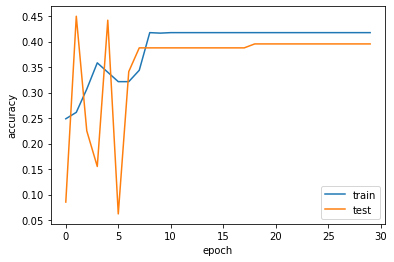

In [60]:
# Check overfit
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(hist.history["accuracy"], label="train")
plt.plot(hist.history["val_accuracy"], label="test")
plt.legend()
plt.show()

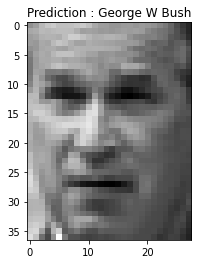

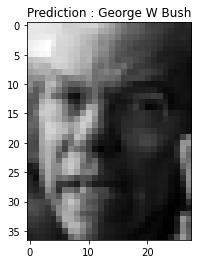

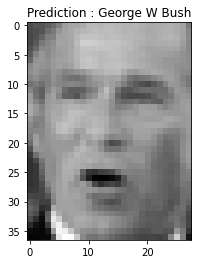

In [61]:
predictions = np.argmax(model.predict([X_test]), axis=1)
for i in range(3):
    plt.imshow(X_test[i].reshape(W,H))
    plt.title("Prediction : " + str(LABELS[predictions[i]]))
    plt.show()

In [62]:
# Probleme : le dataset n'est peut être pas equilibre et le reseaux de neurones arrive a une bonne accuracy en
# predisant que tous les visages sont ceux de george bush.

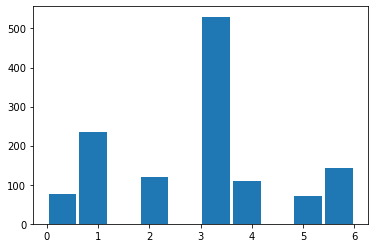

In [63]:
plt.hist(Y,rwidth=0.9)
plt.show()

In [64]:
# On voit ici que l'intuition était correcte et que george bush est sur-represesenter dans nos données.
# Solution numéro 1 : on tronque notre dataset et on sera equilibre 
# Solution numéro 2 : on met un poids pour prendre en compte la repartition des données
# On prend la solution numéro 2 car la répartition est vraiment mauvaise, tronquer nous ferait
# perdre trop de données.

In [65]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight("balanced", np.unique(Y), Y)
class_weights = {i : class_weights[i] for i in range(len(class_weights))}
print(class_weights)

{0: 2.3896103896103895, 1: 0.7796610169491526, 2: 1.5206611570247934, 3: 0.3471698113207547, 4: 1.688073394495413, 5: 2.591549295774648, 6: 1.2777777777777777}


C:\Users\karna\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[0 1 2 3 4 5 6], y=[5 6 3 ... 5 3 5] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [66]:
model = build_model()
hist = model.fit(X_train, Y_train, epochs=EPOCHS, validation_data=(X_valid, Y_valid), class_weight=class_weights)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1036)              1074332   
_________________________________________________________________
dense_5 (Dense)              (None, 128)               132736    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 903       
Total params: 1,224,483
Trainable params: 1,224,483
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
33/33 [==============================] - 1s 10ms/step - loss: 464.7857 - accuracy: 0.1960 - val_loss: 291.5842 - val_accuracy: 0.2248
Epoch 2/30
33/33 [==============================] - 0s 6ms/step - loss: 228.1672 - accuracy: 0.12

In [67]:
# Cela n'ameliore pas notre accuracy et je viens de me rendre compte que les données du dataset n'était pas normalisé.
# Il me semblait avoir vu qu'elle était normalisée pourtant.

In [68]:
print(X[0])

[254.       253.       238.       ...  89.666664  88.666664  87.333336]


In [69]:
Xn = X/255
print(Xn[0])

[0.99607843 0.99215686 0.93333334 ... 0.35163397 0.3477124  0.34248367]


In [70]:
X_train, X2, Y_train, Y2 = train_test_split(Xn, Y, test_size=0.2)
X_test, X_valid, Y_test, Y_valid = train_test_split(X2, Y2, test_size=0.5)

In [71]:
model = build_model()
hist = model.fit(X_train, Y_train, epochs=EPOCHS, validation_data=(X_valid, Y_valid), class_weight=class_weights)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1036)              1074332   
_________________________________________________________________
dense_9 (Dense)              (None, 128)               132736    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 903       
Total params: 1,224,483
Trainable params: 1,224,483
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
33/33 [==============================] - 1s 13ms/step - loss: 2.3019 - accuracy: 0.1697 - val_loss: 1.8513 - val_accuracy: 0.1938
Epoch 2/30
33/33 [==============================] - 0s 8ms/step - loss: 1.9683 - accuracy: 0.1933 - v

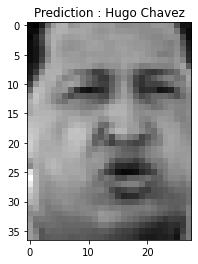

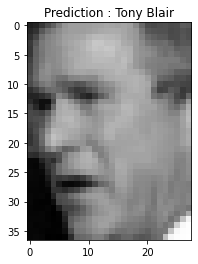

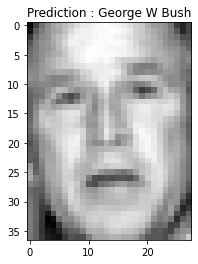

In [72]:
predictions = np.argmax(model.predict([X_test]), axis=1)
for i in range(3):
    plt.imshow(X_test[i].reshape(W,H))
    plt.title("Prediction : " + str(LABELS[predictions[i]]))
    plt.show()

In [73]:
# Les predictions semblent moins aleatoires peut être qu'il manque du temps d'entrainement.

In [74]:
hist = model.fit(X_train, Y_train, epochs=EPOCHS, validation_data=(X_valid, Y_valid), class_weight=class_weights)

Epoch 1/30
33/33 [==============================] - 0s 8ms/step - loss: 0.6912 - accuracy: 0.7369 - val_loss: 0.7155 - val_accuracy: 0.7752
Epoch 2/30
33/33 [==============================] - 0s 6ms/step - loss: 0.4060 - accuracy: 0.8340 - val_loss: 0.6830 - val_accuracy: 0.8372
Epoch 3/30
33/33 [==============================] - 0s 6ms/step - loss: 0.4504 - accuracy: 0.8087 - val_loss: 0.7660 - val_accuracy: 0.7442
Epoch 4/30
33/33 [==============================] - 0s 6ms/step - loss: 0.5406 - accuracy: 0.7971 - val_loss: 1.2629 - val_accuracy: 0.5969
Epoch 5/30
33/33 [==============================] - 0s 6ms/step - loss: 0.5248 - accuracy: 0.7971 - val_loss: 0.8887 - val_accuracy: 0.6977
Epoch 6/30
33/33 [==============================] - 0s 6ms/step - loss: 0.4566 - accuracy: 0.8049 - val_loss: 1.1660 - val_accuracy: 0.6202
Epoch 7/30
33/33 [==============================] - 0s 6ms/step - loss: 0.5544 - accuracy: 0.7573 - val_loss: 1.1849 - val_accuracy: 0.6124
Epoch 8/30
33/33 [==

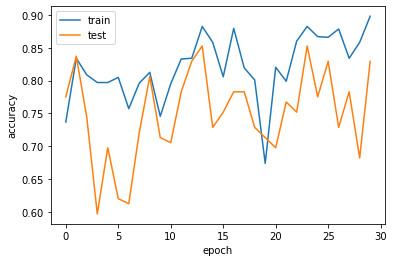

In [75]:
# Check overfit
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(hist.history["accuracy"], label="train")
plt.plot(hist.history["val_accuracy"], label="test")
plt.legend()
plt.show()

In [76]:
# Il semble qu'on arrive a converger sans trop d'overfit, on va maintenant train jusqu'a convergence en prenant
# comme metrics la précision sur le dataset de validation.

In [77]:
def get_callbacks():   
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=20 , verbose=1, mode="max", restore_best_weights=True)
    return [early_stopping]

In [78]:
EPOCHS = 200
hist = model.fit(X_train, Y_train, epochs=EPOCHS, validation_data=(X_valid, Y_valid), class_weight=class_weights, callbacks=get_callbacks())

Epoch 1/200
33/33 [==============================] - 0s 8ms/step - loss: 0.2740 - accuracy: 0.8670 - val_loss: 1.9135 - val_accuracy: 0.5969
Epoch 2/200
33/33 [==============================] - 0s 6ms/step - loss: 0.5690 - accuracy: 0.7777 - val_loss: 0.8872 - val_accuracy: 0.7674
Epoch 3/200
33/33 [==============================] - 0s 6ms/step - loss: 0.2749 - accuracy: 0.8825 - val_loss: 0.5844 - val_accuracy: 0.8450
Epoch 4/200
33/33 [==============================] - 0s 6ms/step - loss: 0.1898 - accuracy: 0.9117 - val_loss: 0.7100 - val_accuracy: 0.8140
Epoch 5/200
33/33 [==============================] - 0s 6ms/step - loss: 0.2474 - accuracy: 0.8903 - val_loss: 1.1241 - val_accuracy: 0.6744
Epoch 6/200
33/33 [==============================] - 0s 6ms/step - loss: 0.6743 - accuracy: 0.7922 - val_loss: 0.8869 - val_accuracy: 0.7829
Epoch 7/200
33/33 [==============================] - 0s 6ms/step - loss: 0.2033 - accuracy: 0.9155 - val_loss: 0.7388 - val_accuracy: 0.8140
Epoch 8/200
3

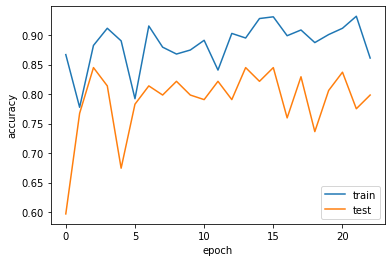

In [79]:
# Check overfit
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(hist.history["accuracy"], label="train")
plt.plot(hist.history["val_accuracy"], label="test")
plt.legend()
plt.show()

In [80]:
predictions = np.argmax(model.predict([X_test]), axis=1)
acc_test = np.where(predictions == Y_test, 1, 0).mean()
print(acc_test)

0.8837209302325582


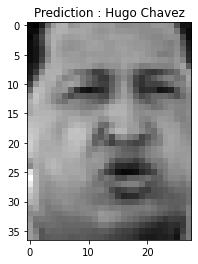

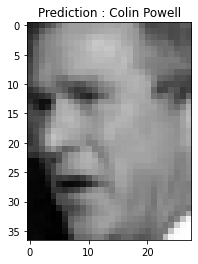

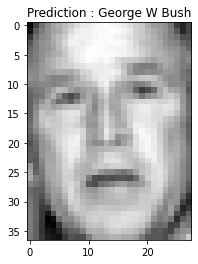

In [81]:
predictions = np.argmax(model.predict([X_test]), axis=1)
for i in range(3):
    plt.imshow(X_test[i].reshape(W,H))
    plt.title("Prediction : " + str(LABELS[predictions[i]]))
    plt.show()

In [82]:
# On atteint une bonne précision, pour l'augmenter on pourrait :
# Essayer d'augmenter le nombre de neurones ou de couches en surveillant l'overfitting.
# Passer a un reseau de type CNN plus adapté pour les images.
# Ajouter des dimensions avec certains features descriptors ou eigenfaces.
# On va essayer d'ajouter des descripteur HOG.

In [83]:
from skimage.feature import hog

fd, hog_image = hog(X_train[0].reshape(W,H), orientations=9, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True)

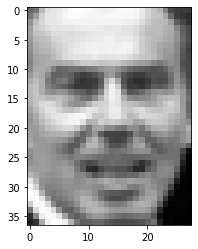

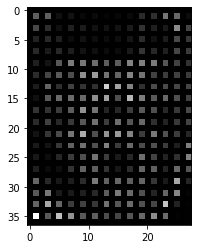

In [84]:
plt.imshow(X_train[0].reshape(W,H))
plt.show()

plt.imshow(hog_image)
plt.show()

In [85]:
def add_hogs(X):
    X_augmented = np.zeros((X.shape[0], W, H))
    for i, img in enumerate(X) :
        X_augmented[i] = hog(img.reshape(W,H), orientations=9, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True)[1]
    return X_augmented

In [86]:
X_augmented = add_hogs(X)

In [87]:
X_augmented = X_augmented.reshape(X_augmented.shape[0], H*W)

In [88]:
X_full = np.zeros((X.shape[0], H*W*2))
for i in range(X.shape[0]):
    X_full[i] = np.concatenate((X[i], X_augmented[i]))

In [89]:
print(X_full.shape)

(1288, 2072)


In [90]:
X_train, X2, Y_train, Y2 = train_test_split(X_full, Y, test_size=0.2)
X_test, X_valid, Y_test, Y_valid = train_test_split(X2, Y2, test_size=0.5)

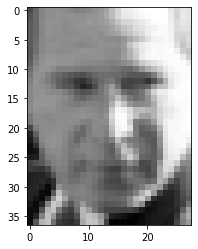

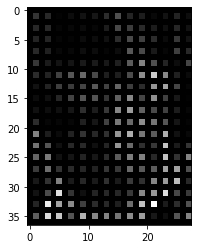

In [91]:
plt.imshow(X_train[0][:X_train.shape[1]//2].reshape(W,H))
plt.show()

plt.imshow(X_train[0][X_train.shape[1]//2:].reshape(W,H))
plt.show()

In [92]:
NB_NEURONS = 128

In [93]:
def build_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=W*H*2, input_shape=(W*H*2,), activation="linear"))
    model.add(tf.keras.layers.Dense(units=NB_NEURONS, activation="relu")) 
    model.add(tf.keras.layers.Dense(units=NB_NEURONS, activation="relu")) 
    model.add(tf.keras.layers.Dense(units=N_CLASS, activation="softmax")) 
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.summary()
    return model

In [94]:
model = build_model()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2072)              4295256   
_________________________________________________________________
dense_13 (Dense)             (None, 128)               265344    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 903       
Total params: 4,578,015
Trainable params: 4,578,015
Non-trainable params: 0
_________________________________________________________________


In [95]:
EPOCHS = 200
hist = model.fit(X_train, Y_train, epochs=EPOCHS, validation_data=(X_valid, Y_valid), class_weight=class_weights, callbacks=get_callbacks())

Epoch 1/200
33/33 [==============================] - 1s 23ms/step - loss: 840.7883 - accuracy: 0.1653 - val_loss: 403.6963 - val_accuracy: 0.1163
Epoch 2/200
33/33 [==============================] - 1s 18ms/step - loss: 415.2841 - accuracy: 0.1715 - val_loss: 158.6242 - val_accuracy: 0.3798
Epoch 3/200
33/33 [==============================] - 1s 18ms/step - loss: 209.4173 - accuracy: 0.2574 - val_loss: 314.1909 - val_accuracy: 0.1240
Epoch 4/200
33/33 [==============================] - 1s 18ms/step - loss: 150.2287 - accuracy: 0.2004 - val_loss: 35.9206 - val_accuracy: 0.2093
Epoch 5/200
33/33 [==============================] - 1s 18ms/step - loss: 61.2454 - accuracy: 0.2514 - val_loss: 51.6286 - val_accuracy: 0.1705
Epoch 6/200
33/33 [==============================] - 1s 18ms/step - loss: 29.0550 - accuracy: 0.3273 - val_loss: 20.3153 - val_accuracy: 0.2558
Epoch 7/200
33/33 [==============================] - 1s 18ms/step - loss: 22.0859 - accuracy: 0.3228 - val_loss: 8.1465 - val_acc

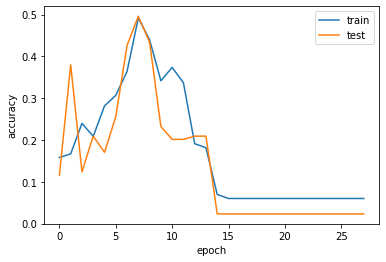

In [96]:
# Check overfit
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(hist.history["accuracy"], label="train")
plt.plot(hist.history["val_accuracy"], label="test")
plt.legend()
plt.show()

In [97]:
# Trop de dimensions ? Mauvaise utilisation des HOG ? 
# On va essayer un CNN très simple :

In [169]:
X_cnn = X.reshape((X.shape[0], W, H, 1))

In [170]:
X_cnn.shape

(1288, 37, 28, 1)

In [209]:
X_train, X2, Y_train, Y2 = train_test_split(X_cnn, Y, test_size=0.2)
X_test, X_valid, Y_test, Y_valid = train_test_split(X2, Y2, test_size=0.5)

In [210]:
Y_train_one_hot = tf.keras.utils.to_categorical(Y_train, N_CLASS)
Y_valid_one_hot = tf.keras.utils.to_categorical(Y_valid, N_CLASS)

In [223]:
def build_model():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(NB_NEURONS/2, (3, 3), activation='relu', input_shape=(W,H,1)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Conv2D(NB_NEURONS, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(NB_NEURONS, (3, 3), activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(NB_NEURONS/2, activation='relu'))
    model.add(tf.keras.layers.Dense(units=N_CLASS, activation="softmax")) 
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.summary()
    return model

In [224]:
model = build_model()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 35, 26, 64)        640       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 17, 13, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 17, 13, 64)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 15, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 7, 5, 128)         0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 5, 3, 128)         147584    
_________________________________________________________________
flatten_12 (Flatten)         (None, 1920)            

In [ ]:
EPOCHS = 200
hist = model.fit(X_train, Y_train_one_hot, epochs=EPOCHS, validation_data=(X_valid, Y_valid_one_hot), class_weight=class_weights, callbacks=get_callbacks())

Epoch 1/200
33/33 [==============================] - 2s 34ms/step - loss: 12.7418 - accuracy: 0.1412 - val_loss: 2.0790 - val_accuracy: 0.2016
Epoch 2/200
33/33 [==============================] - 1s 29ms/step - loss: 2.0155 - accuracy: 0.1792 - val_loss: 1.8877 - val_accuracy: 0.3643
Epoch 3/200
33/33 [==============================] - 1s 29ms/step - loss: 1.9713 - accuracy: 0.3136 - val_loss: 1.8983 - val_accuracy: 0.3643
Epoch 4/200
33/33 [==============================] - 1s 30ms/step - loss: 1.9834 - accuracy: 0.2646 - val_loss: 1.8607 - val_accuracy: 0.3798
Epoch 5/200
33/33 [==============================] - 1s 31ms/step - loss: 1.9264 - accuracy: 0.3530 - val_loss: 1.8789 - val_accuracy: 0.2326
Epoch 6/200
33/33 [==============================] - 1s 30ms/step - loss: 1.8268 - accuracy: 0.2837 - val_loss: 1.6281 - val_accuracy: 0.5039
Epoch 7/200
33/33 [==============================] - 1s 30ms/step - loss: 1.7233 - accuracy: 0.4034 - val_loss: 1.4622 - val_accuracy: 0.6202
Epoch

In [ ]:
# Check overfit
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(hist.history["accuracy"], label="train")
plt.plot(hist.history["val_accuracy"], label="test")
plt.legend()
plt.show()

In [215]:
predictions = np.argmax(model.predict([X_test]), axis=1)
print(predictions.shape)
print(Y_test.shape)
acc_test = np.where(predictions == Y_test, 1, 0).mean()
print(acc_test)

(129,)
(129,)
0.8992248062015504
